##  Data exploration analyses

# Imports

In [1]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
pio.renderers.default = "colab"

from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os

# Data

In [2]:
#Connect to google drive
from google.colab import drive
drive.mount('drive/')

Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


In [3]:
#Path to data folder
path_data = '/content/drive/MyDrive/time_series/timeseries_HAKIM/Hakim_20 09 2021(semaine2TS)/Ressources/Projet'

In [4]:
#Load data
Energy = pd.read_csv(path_data+'/energy_use_in_the_UK.csv', sep=';', index_col=' timestamp',parse_dates=True)

In [5]:
#Create copy
energy = Energy.copy()

## Data exploration

In [21]:
energy.head()

,coal,nuclear,wind,hydro,solar
timestamp,,,,,
2012-01-01 00:00:01,8693,7121,2740,728,0.0
2012-01-01 00:05:06,8650,7120,2812,732,0.0
2012-01-01 00:10:01,8880,7125,2896,744,0.0
2012-01-01 00:15:01,9111,7122,2964,748,0.0
2012-01-01 00:20:01,9195,7114,2992,750,0.0


In [6]:
#Detete space before each name's column
energy.columns = ['coal', 'nuclear', 'wind', 'hydro','solar']

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 796453 entries, 2012-01-01 00:00:01 to 2019-08-03 20:10:34
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0    coal     796453 non-null  int64  
 1    nuclear  796453 non-null  int64  
 2    wind     796453 non-null  int64  
 3    hydro    796453 non-null  int64  
 4    solar    796453 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 36.5 MB


In [ ]:
energy.isna().sum()

coal       0
nuclear    0
wind       0
hydro      0
solar      0
total      0
dtype: int64

In [7]:
#Total energy consumption 
energy['total'] = energy['coal'] + energy['nuclear'] + energy['wind'] + energy['hydro'] + energy['solar']

In [ ]:
energy.describe()

,coal,nuclear,wind,hydro,solar,total
count,796453.000000,796453.000000,796453.000000,796453.000000,7.964530e+05,7.964530e+05
mean,7533.566650,7214.377451,2905.132293,400.898907,4.413354e+02,1.849531e+04
std,6410.003369,934.940076,2233.491732,255.525493,2.587864e+03,6.480662e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1226.000000,6684.000000,1142.000000,189.000000,0.000000e+00,1.375300e+04
50%,6420.000000,7337.000000,2353.000000,362.000000,0.000000e+00,1.774600e+04
75%,13070.000000,7888.000000,4162.000000,575.000000,0.000000e+00,2.294300e+04
max,25239.000000,9346.000000,12456.000000,1434.000000,1.420000e+06,1.434469e+06


## Graphical exploration

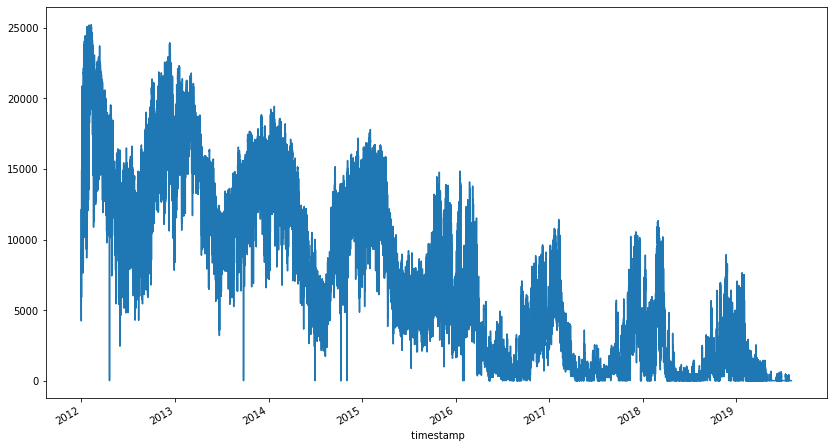

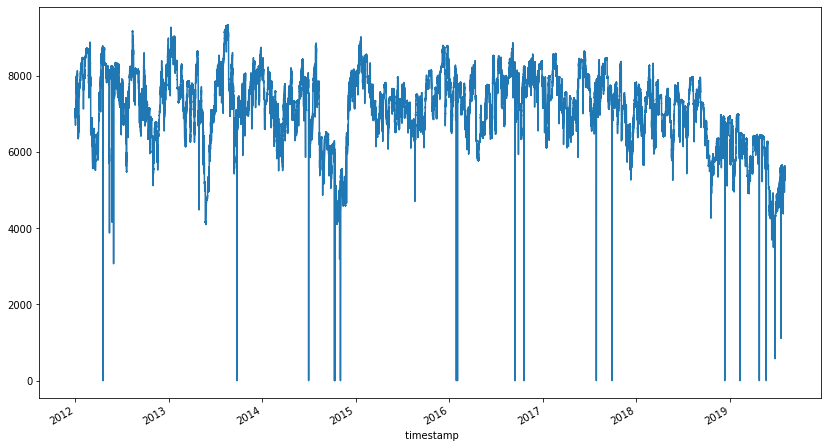

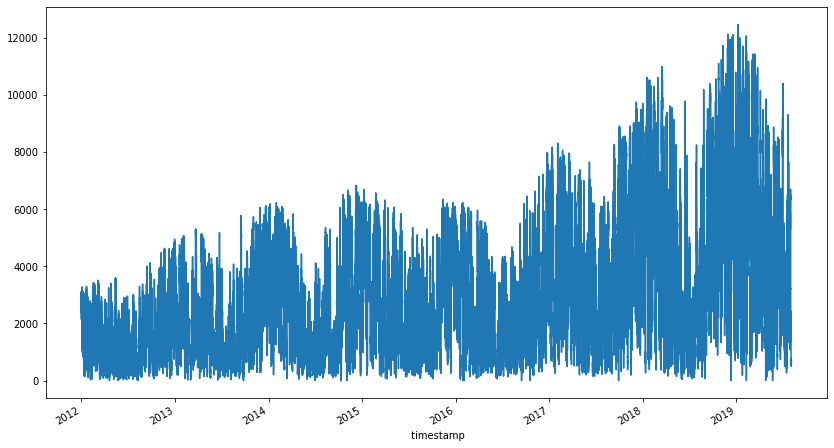

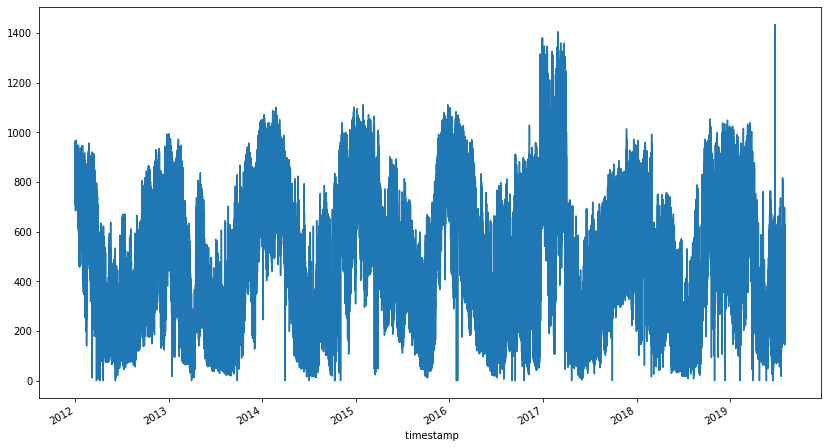

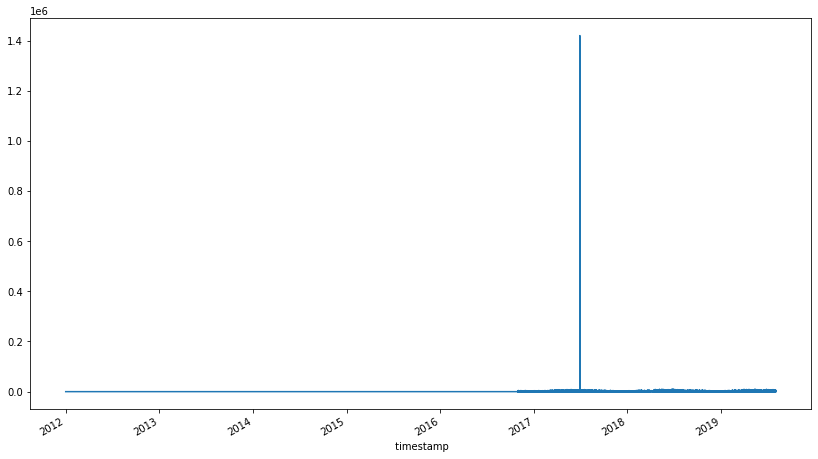

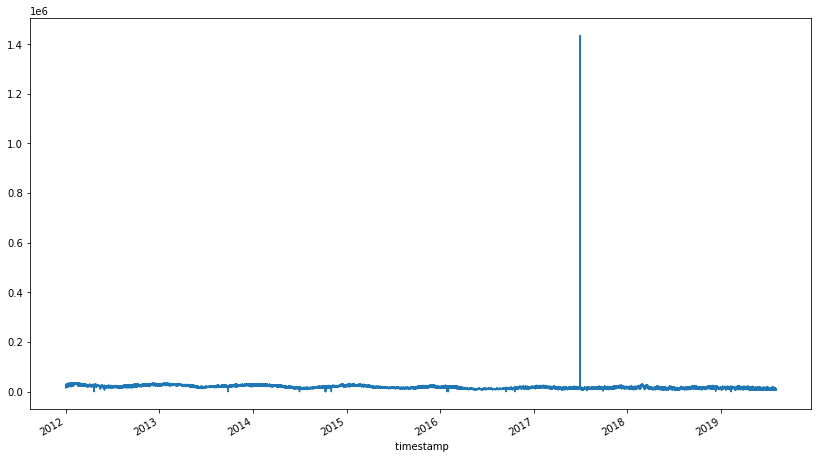

In [30]:
for col in energy.columns:
  fig, axes = plt.subplots()
  energy[col].plot(figsize=(14,8))

### Cleaning solar data

In [ ]:
fig = px.line(energy.reset_index(), x='timestamp', y="solar")
fig.show()

In [8]:
# We have 2 outlayers in solar column
energy.loc['2017-06-29-15','solar'][7] = 1420.
energy.loc['2017-06-29-15','solar'][8] = 1420.

### Cleaning duplicates data

In [9]:
energy.index.duplicated(keep='first').sum()

52

In [10]:
energy = energy[~energy.index.duplicated(keep='first')]

In [76]:
energy = energy[energy['nuclear'] != 0]

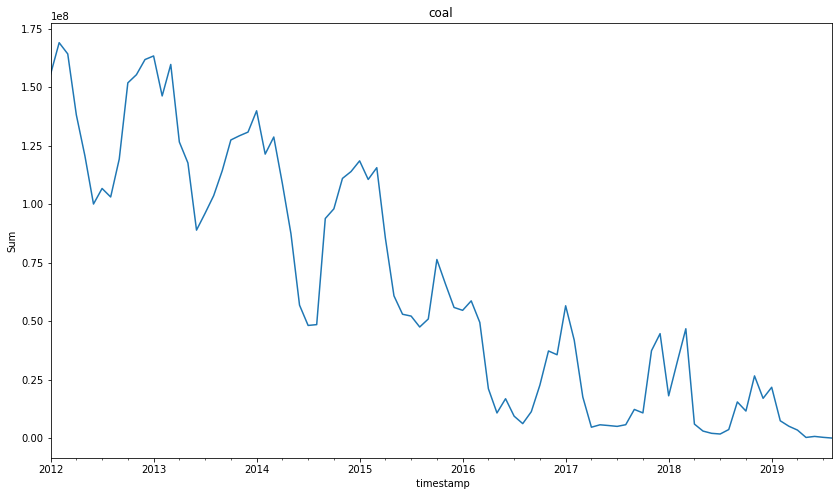

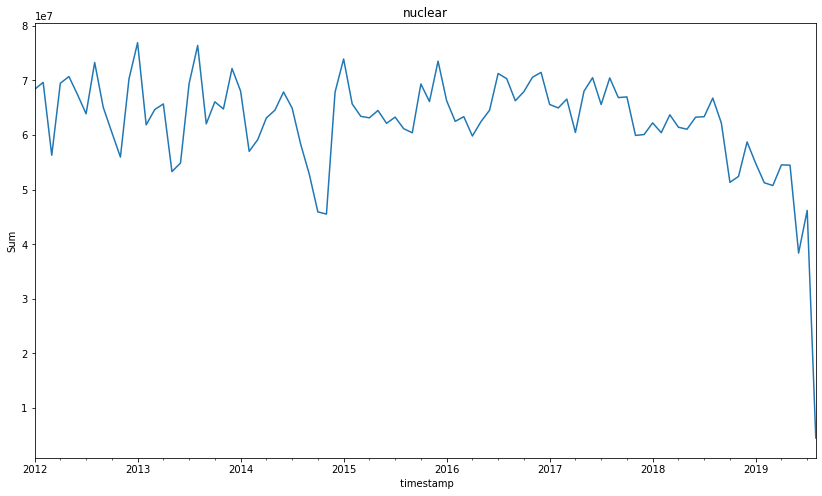

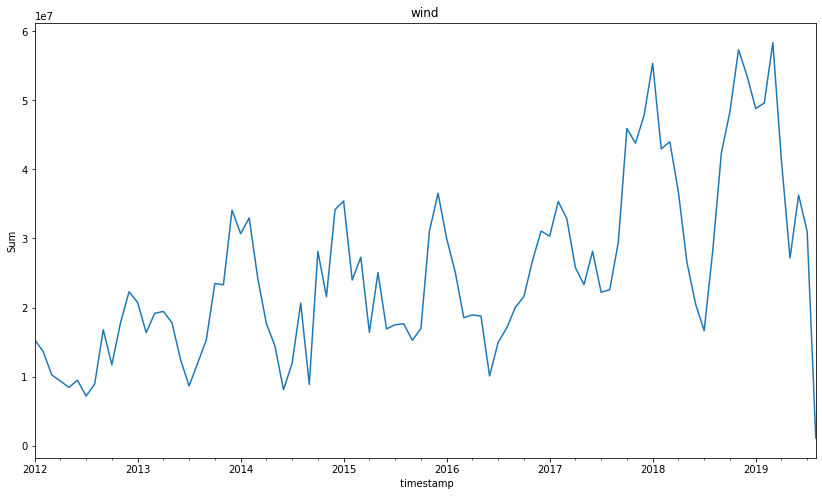

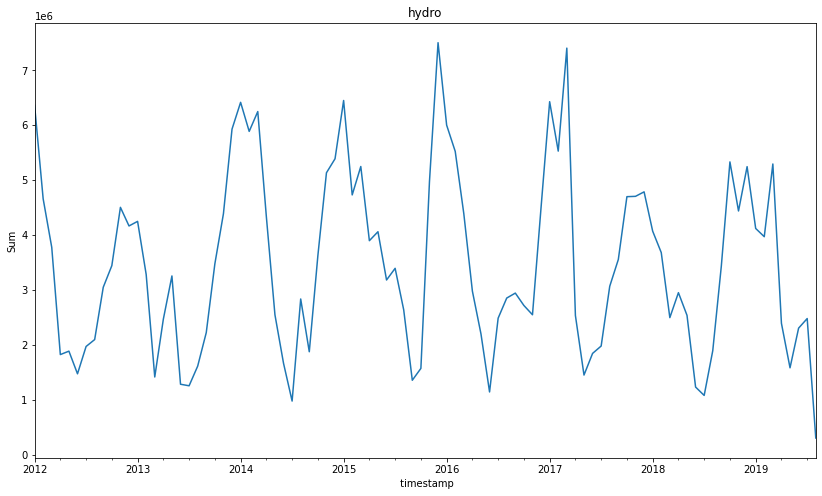

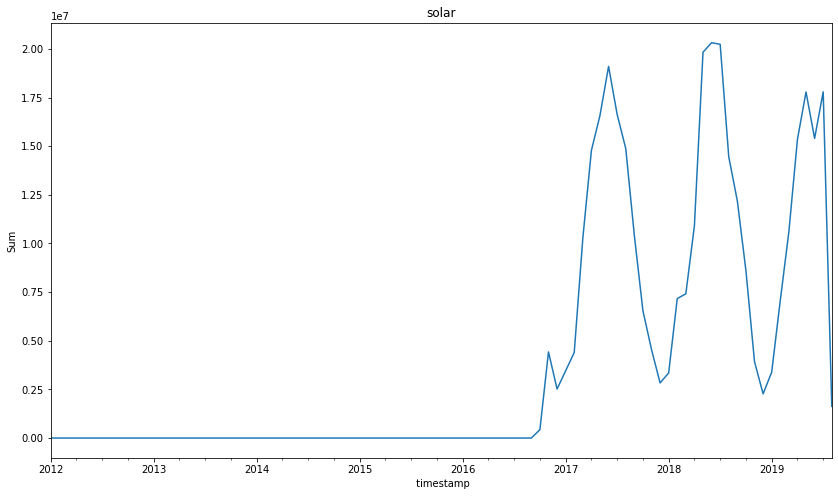

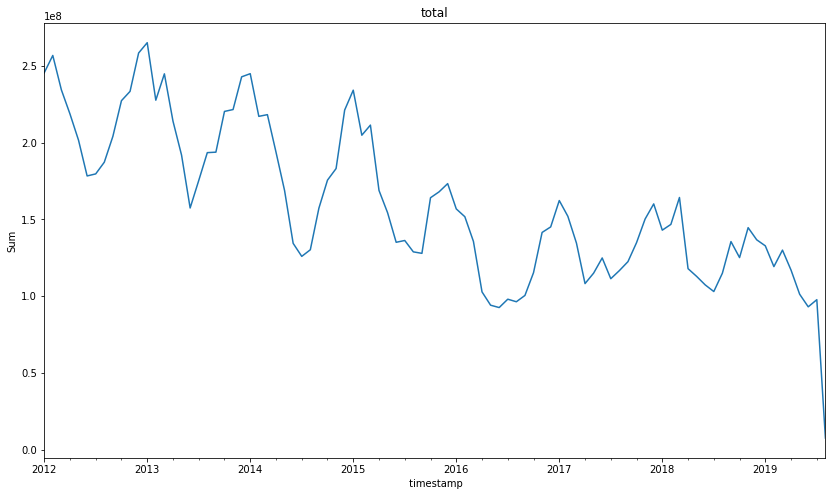

In [ ]:
for col in energy.columns[:6]:
  fig, axes = plt.subplots()
  energy[col].resample('M').sum().plot(figsize=(14,8))
  axes.set_ylabel('Sum')
  axes.set_title(col)

## Analyse by period

In [11]:
energy = energy.reset_index()
energy = energy.rename(columns={' timestamp':'timestamp'})
energy['year'] = energy['timestamp'].dt.year
energy['month'] = energy['timestamp'].dt.month
energy['month_name'] = energy['timestamp'].dt.month_name()
energy['day'] = energy['timestamp'].dt.day
energy['day_name'] = energy['timestamp'].dt.day_name()
energy['hour'] = energy['timestamp'].dt.hour
energy = energy.set_index('timestamp')

In [57]:
energy.head()

,coal,nuclear,wind,hydro,solar,total,year,month,month_name,day,day_name,hour
timestamp,,,,,,,,,,,,
2012-01-01 00:00:01,8693,7121,2740,728,0.0,19282.0,2012,1,January,1,Sunday,0
2012-01-01 00:05:06,8650,7120,2812,732,0.0,19314.0,2012,1,January,1,Sunday,0
2012-01-01 00:10:01,8880,7125,2896,744,0.0,19645.0,2012,1,January,1,Sunday,0
2012-01-01 00:15:01,9111,7122,2964,748,0.0,19945.0,2012,1,January,1,Sunday,0
2012-01-01 00:20:01,9195,7114,2992,750,0.0,20051.0,2012,1,January,1,Sunday,0


### Per year

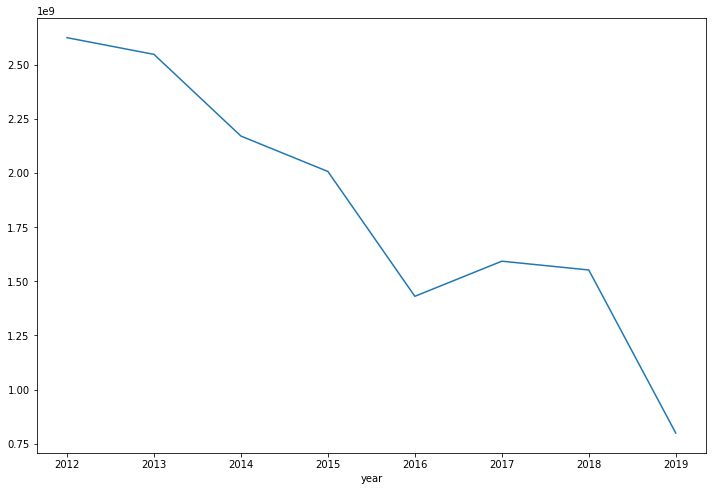

In [ ]:
#Total per year
energy.groupby('year')['total'].sum().plot(figsize=(12,8))

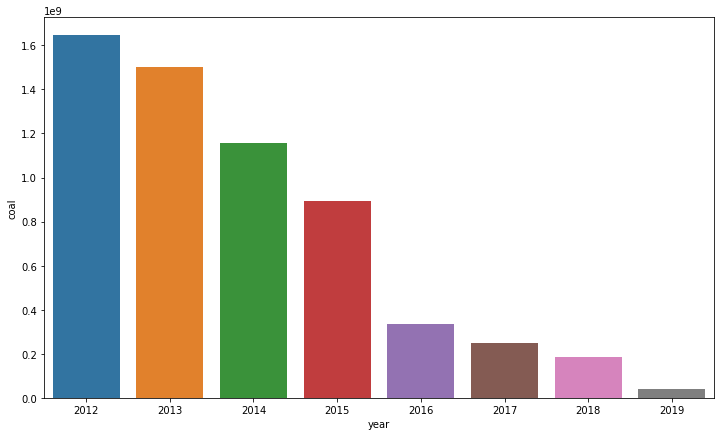

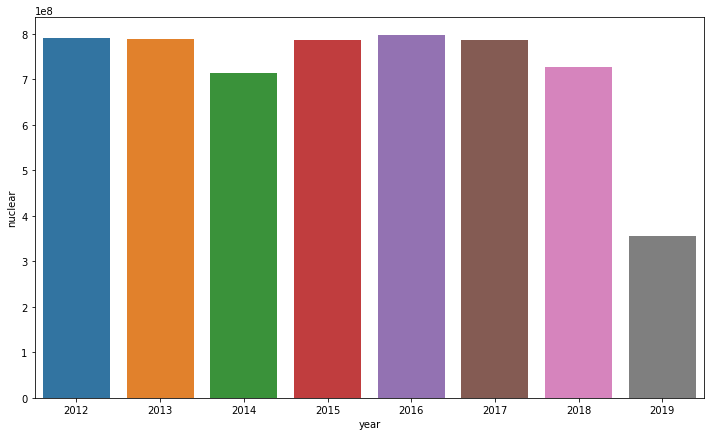

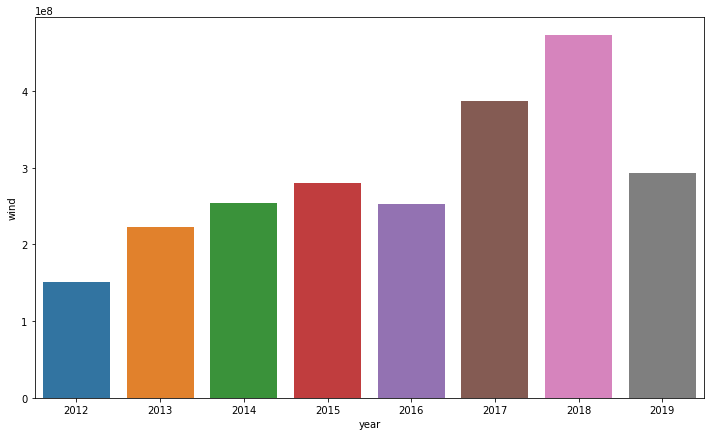

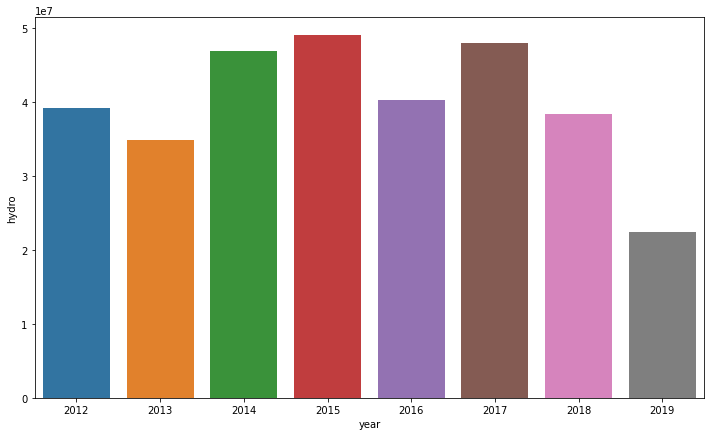

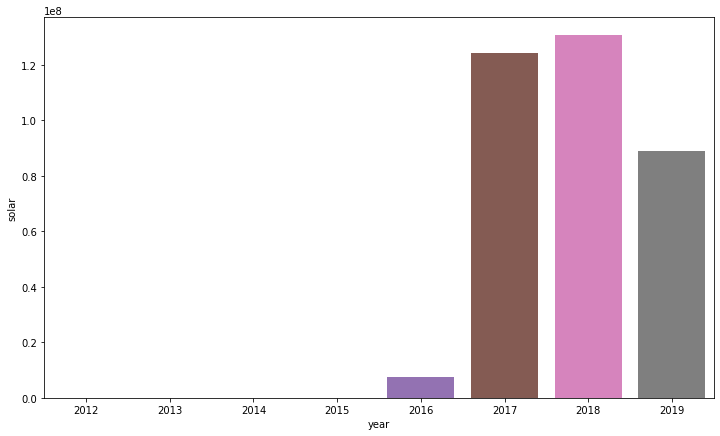

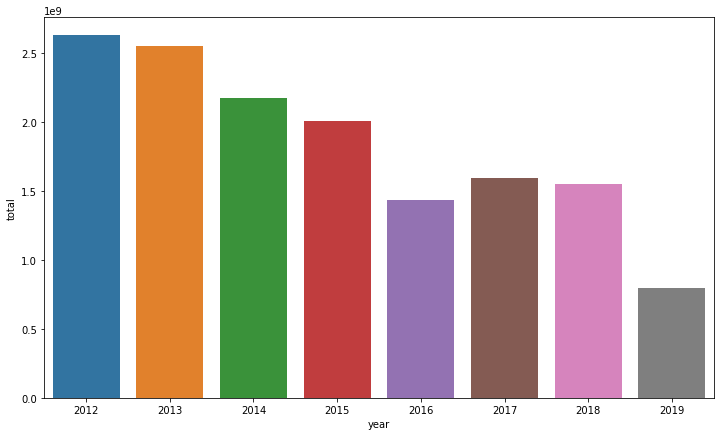

In [ ]:
for col in energy.columns[:6]:
  plt.figure(figsize=(12,7))
  sum_col_year = energy.groupby('year', as_index=False)[col].sum()
  sns.barplot(x='year', y=col, data=sum_col_year)

In [9]:
sum_energy_year = energy.groupby('year', as_index=False)[energy.columns[:6]].sum()
sum_energy_year

,year,coal,nuclear,wind,hydro,solar,total
0,2012,1645181427,790920607,151091986,39240005,0.000000e+00,2.626434e+09
1,2013,1503454027,788236744,222769726,34869253,0.000000e+00,2.549330e+09
2,2014,1156030581,715178867,253407457,46954900,0.000000e+00,2.171572e+09
3,2015,892096639,786718376,280039180,49021648,0.000000e+00,2.007876e+09
4,2016,333439832,796861230,252911795,40313912,7.374983e+06,1.430902e+09
5,2017,247084364,786055429,387554973,48003718,1.244631e+08,1.593162e+09
6,2018,184086684,726964962,472453950,38424821,1.306645e+08,1.552595e+09
7,2019,38758205,354976349,293572263,22468880,8.900042e+07,7.987761e+08


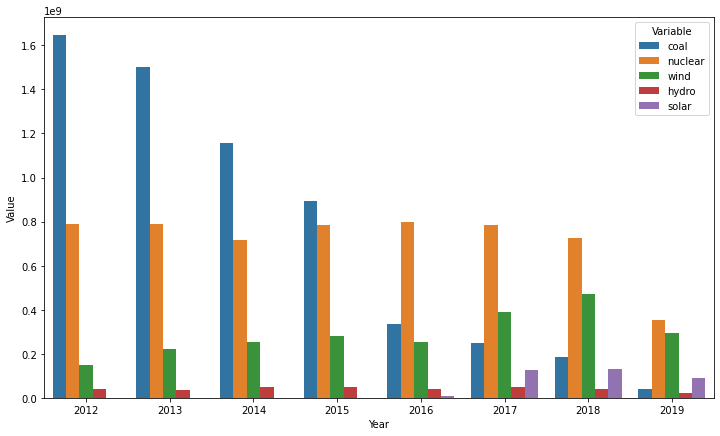

In [10]:
plt.figure(figsize=(12,7))
tidy = sum_energy_year.drop('total', axis=1).melt(id_vars='year').rename(columns=str.title)
sns.barplot(data=tidy,x='Year', y='Value', hue='Variable')

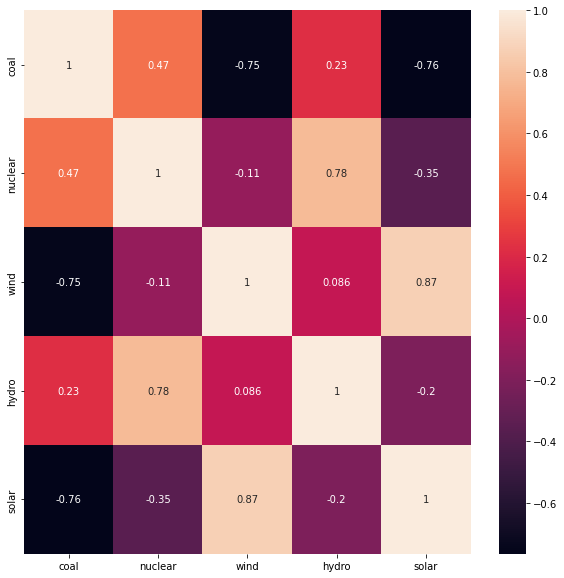

In [164]:
plt.figure(figsize=(10,10))
sns.heatmap(sum_energy_year.drop(['year', 'total'], axis=1).corr(), annot=True)



*   Stronge correlation between coal and nuclear
*   Strong correlation between wind and solar
*   Hydro seems to be an adjustable variable 

### Per month

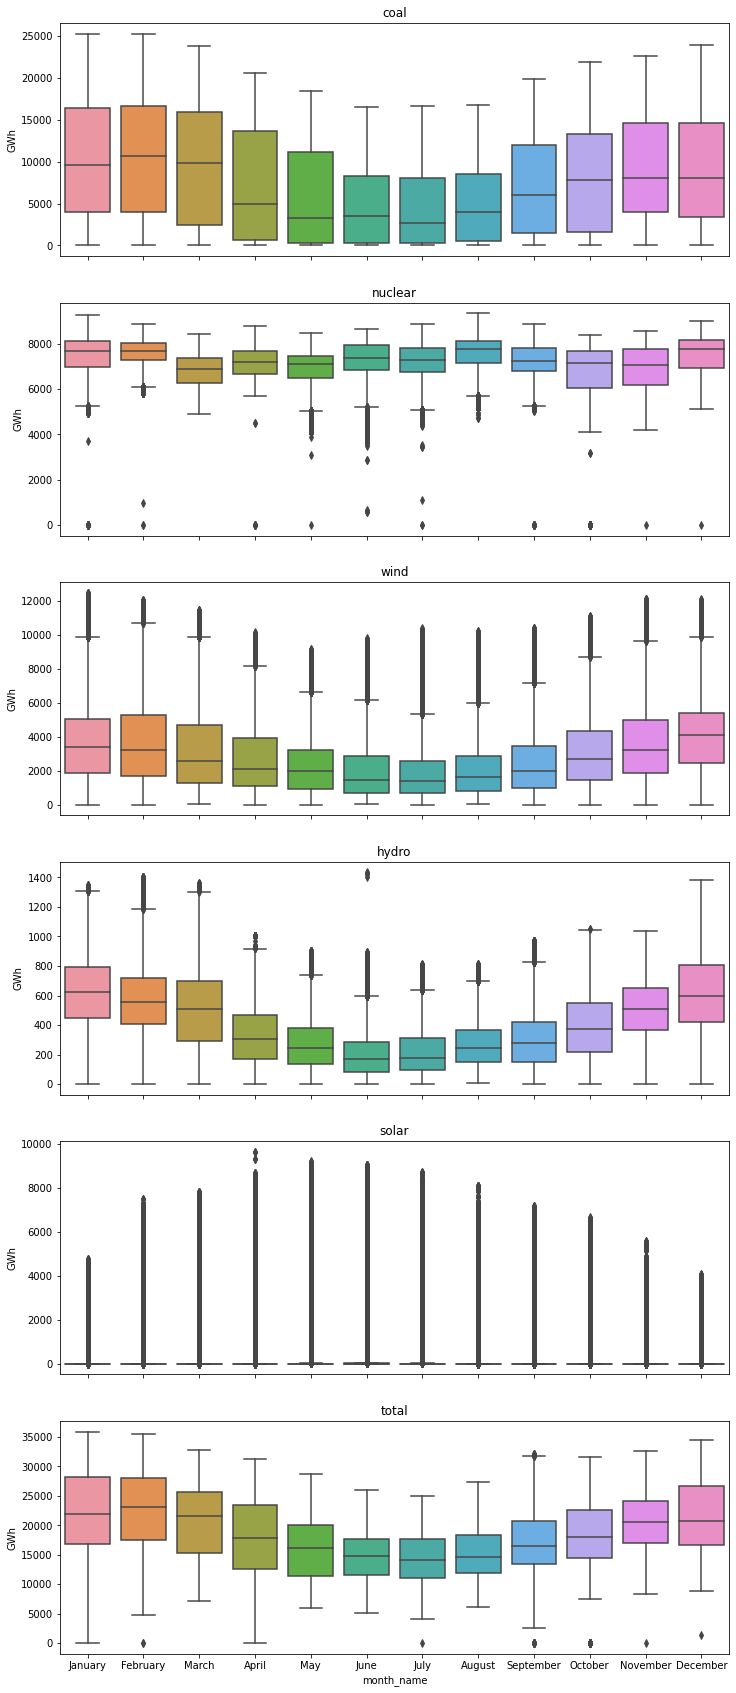

In [31]:
fig, axes = plt.subplots(6, 1, figsize=(12, 30), sharex=True)
for name, ax in zip(energy.columns[:7], axes):
  sns.boxplot(data=energy, x='month_name', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  # Remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
      ax.set_xlabel('')

### Per week

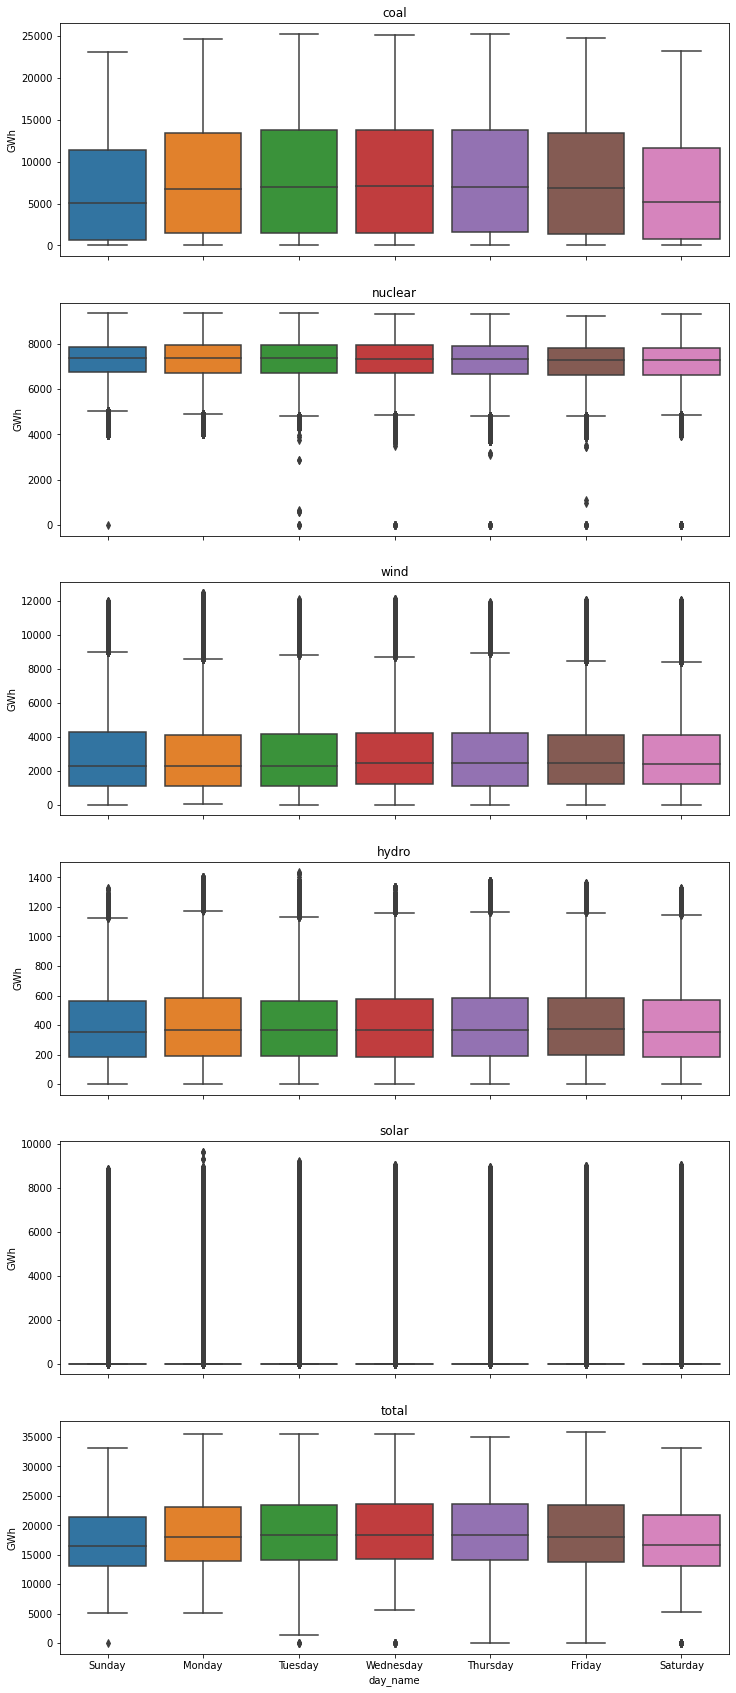

In [32]:
fig, axes = plt.subplots(6, 1, figsize=(12, 30), sharex=True)
for name, ax in zip(energy.loc['2019'].columns[:7], axes):
  sns.boxplot(data=energy, x='day_name', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  # Remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
      ax.set_xlabel('')

## Ratio

In [77]:
energy_day = energy.loc[:'2019-07', :'total'].resample('D').mean()*288

In [92]:
energy_density = pd.DataFrame()

In [97]:
for col in energy.columns[:5]:
  energy_density[col] =  energy_day[col] / energy_day['total']

In [98]:
energy_density

,coal,nuclear,wind,hydro,solar
timestamp,,,,,
2012-01-01,0.448023,0.371388,0.139145,0.041445,0.000000
2012-01-02,0.490097,0.339870,0.132675,0.037358,0.000000
2012-01-03,0.607780,0.275141,0.085308,0.031772,0.000000
2012-01-04,0.617648,0.256823,0.096280,0.029249,0.000000
2012-01-05,0.600488,0.273683,0.095798,0.030031,0.000000
...,...,...,...,...,...
2019-07-27,0.000000,0.531753,0.315337,0.038343,0.114567
2019-07-28,0.000000,0.469165,0.366079,0.031662,0.133093
2019-07-29,0.000000,0.526027,0.209874,0.029171,0.234927


## Save CSV

In [100]:
cd /content/drive/MyDrive/time_series/timeseries_HAKIM/Hakim_20_09_2021(semaine2TS)/Ressources/Projet/energy_csv/

/content/drive/MyDrive/time_series/timeseries_HAKIM/Hakim_20_09_2021(semaine2TS)/Ressources/Projet/energy_csv


In [101]:
energy_day.loc[:'2018', :'total'].resample('Y').sum().to_csv('energy_sum_year.csv')

In [102]:
energy_day.loc[:'2019-07', :'total'].resample('M').sum().to_csv('energy_sum_month.csv')

In [103]:
energy_day.loc[:'2019-07', :'total'].resample('W').sum().to_csv('energy_sum_week.csv')

In [104]:
energy_day.to_csv('energy_sum_day.csv')

In [105]:
energy_density.loc[:'2018', :'solar'].resample('Y').sum().to_csv('density_energy_sum_year.csv')

In [106]:
energy_density.loc[:'2019-07', :'solar'].resample('M').sum().to_csv('density_energy_sum_month.csv')

In [107]:
energy_density.loc[:'2019-07', :'solar'].resample('W').sum().to_csv('density_energy_sum_week.csv')

In [108]:
energy_density.to_csv('density_energy_sum_day.csv')